### load packages

In [1]:
import sys
sys.path.append('..') # add parent directory to path

import numpy as np 
import pandas as pd
from utils import processing as pr

### load data for month of choice
I created a loading file that directly loads the data files from the NYC TLC website. You can input month and year as either value types or string types. Here, we load only the `yellow` taxi data.

In [2]:
# load yellow taxi data for month 01/2023
df = pr.load_taxi_data(month = 1, year = 2023, vehicle_type = 'yellow')

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [26]:
# split datetime into data and time
df.rename(
    columns = {'tpep_pickup_datetime': 'pickup_datetime',
               'tpep_dropoff_datetime': 'dropoff_datetime'}, 
    inplace = True
)
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_time'] = df['pickup_datetime'].dt.time
df['hour'] = df['pickup_datetime'].dt.hour

In [35]:
print(df.pickup_datetime.sort_values().head())
print('\n ')
print('Min: ' + str(df.pickup_datetime.sort_values().min()), ', Max: ' + str(df.pickup_datetime.sort_values().max()))

2138036   2008-12-31 23:01:42
209091    2008-12-31 23:04:41
10023     2022-10-24 17:37:47
18219     2022-10-24 20:01:46
21660     2022-10-24 21:45:35
Name: pickup_datetime, dtype: datetime64[us]

 
Min: 2008-12-31 23:01:42 , Max: 2023-02-01 00:56:53


In [42]:
# remove rows with year not equal to 2023 and within January
df = df[(df.pickup_datetime.dt.year == 2023) & (df.pickup_datetime.dt.month == 1)]
df.pickup_datetime.sort_values().head()

2995098   2023-01-01 00:00:00
3497      2023-01-01 00:00:05
2506      2023-01-01 00:00:06
3499      2023-01-01 00:00:08
4475      2023-01-01 00:00:09
Name: pickup_datetime, dtype: datetime64[us]

In [43]:
# bin counts by hour and date
df.groupby(['pickup_date', 'hour']).size().unstack().fillna(0)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
pickup_date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,5336,5752,5097,3952,2501,1097,908,1021,1147,1650,...,4252,4326,4253,4099,3720,3442,2901,2778,2607,2035
2023-01-02,1280,755,433,379,371,394,799,1176,1540,2325,...,5195,5286,5137,5075,4348,3915,3607,3268,2763,1818
2023-01-03,1322,751,392,288,255,656,1868,3342,4431,4545,...,5628,5760,5677,6016,5908,5037,3848,3673,2878,2307
2023-01-04,1558,670,382,242,264,610,1602,3398,4387,4727,...,6047,6379,6996,6968,8130,6744,4652,4390,3769,2841
2023-01-05,1736,800,490,318,314,575,1697,3553,4567,5087,...,6449,6694,6438,7303,7668,6320,5556,5447,4602,3578
2023-01-06,2187,1128,564,347,321,642,1472,3195,4109,4526,...,6663,6499,6318,7178,7240,6955,5519,5744,5947,5426
2023-01-07,4719,3900,2773,1685,827,497,814,1436,2065,3165,...,6248,6391,6493,6580,6610,6702,5662,5739,6339,5603
2023-01-08,5231,4307,3230,1971,1025,490,758,1145,1703,2569,...,5725,5539,5815,5360,4821,4252,3681,3610,2595,2091
2023-01-09,1267,482,295,241,267,581,1730,3480,4488,4550,...,5516,5894,5710,6499,6334,5478,4513,4024,3240,2023


### binning the data
Each time step in our time series will correspond to quantities from the previous hour. E.g., we will define $y_t$ to be the number of rides occurring in a given taxi zone from time $y_{t-1}$ to $y_{t}$, where $t$ is measured in hours.

/tmp/ipykernel_16196/4030157715.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts = df.set_index('pickup_datetime').groupby(pd.Grouper(freq='H')).size()


<Axes: xlabel='pickup_datetime'>

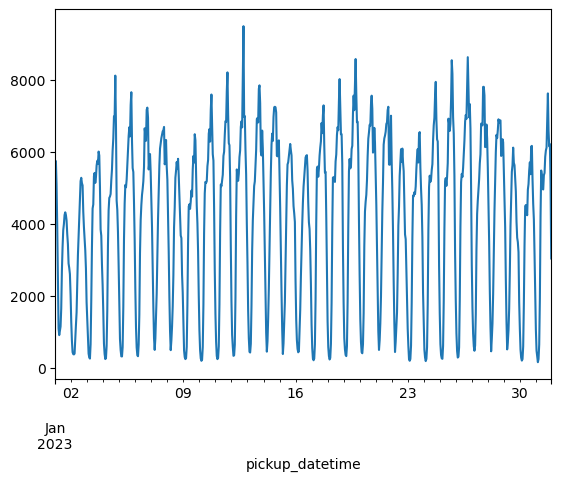

In [46]:
# convert to hourly time series
ts = df.set_index('pickup_datetime').groupby(pd.Grouper(freq='H')).size()
ts.head()

# plot hourly time series
ts.plot()

In [62]:
print(df['PULocationID'].value_counts().head())
df_132 = df[df['PULocationID'] == 132]

PULocationID
132    160024
237    148074
236    138391
161    135415
186    109226
Name: count, dtype: int64


/tmp/ipykernel_16196/2313355918.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts = df_132.set_index('pickup_datetime').groupby(pd.Grouper(freq='H')).size()


(464808.0, 465048.0)

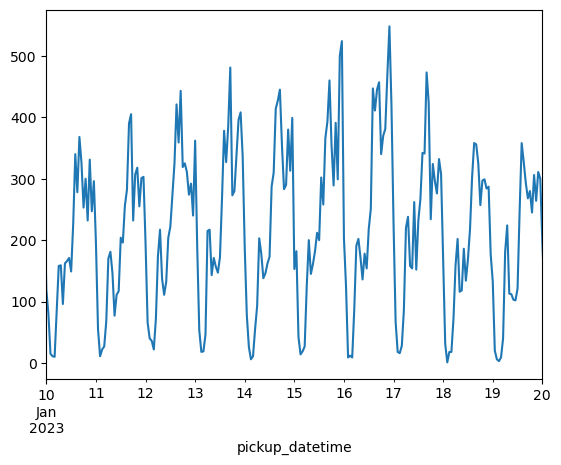

In [60]:
# convert to hourly time series
ts = df_132.set_index('pickup_datetime').groupby(pd.Grouper(freq='H')).size()
ts.head()

# plot hourly time series
ts.plot()
plt.xlim('2023-01-10', '2023-01-20')

In [71]:
# load yellow taxi data for month 01/2023
df_fhv = pr.load_taxi_data(month = 1, year = 2023, vehicle_type = 'fhvhv')

In [72]:
df_fhv.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

In [73]:
print(df_fhv['PULocationID'].value_counts().head())

PULocationID
132    346138
138    307590
79     276059
230    242050
61     241050
Name: count, dtype: int64


In [2]:
# load yellow taxi data for month 01/2023
df_fhv2 = pr.load_taxi_data(month = 1, year = 2023, vehicle_type = 's')

ValueError: Vehicle must be either 'yellow', 'green', 'fhv', or 'hvfhv'